# Selección de K - método del codo

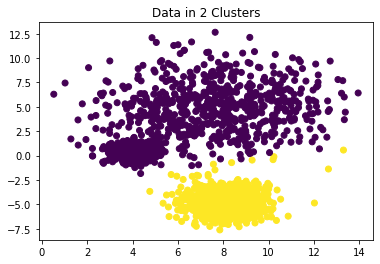

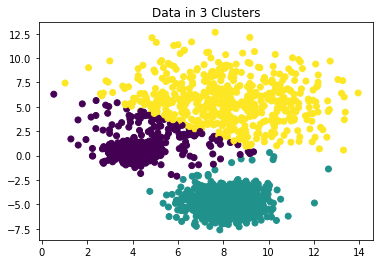

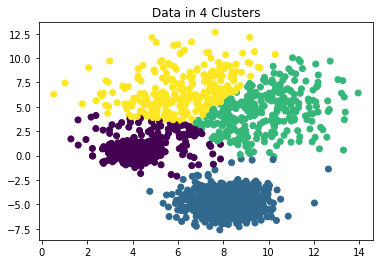

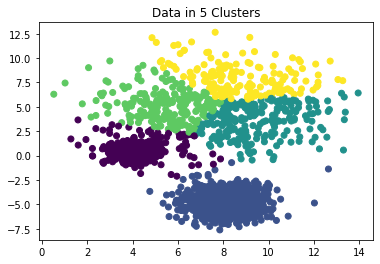

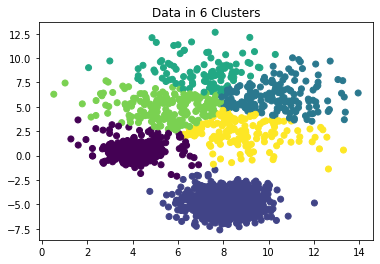

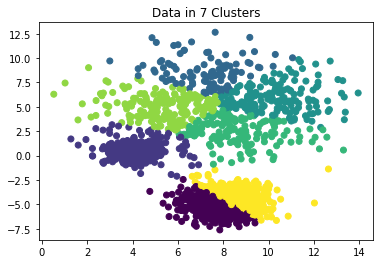

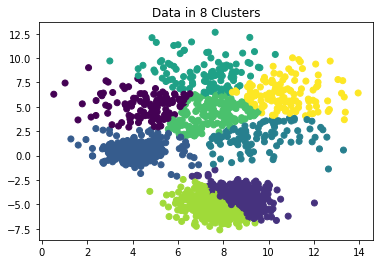

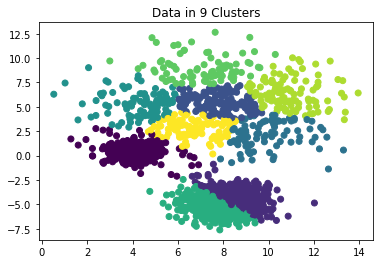

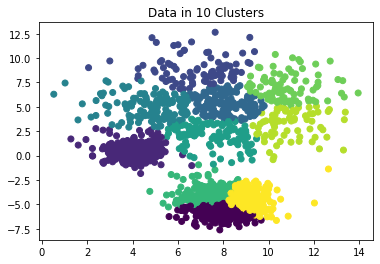

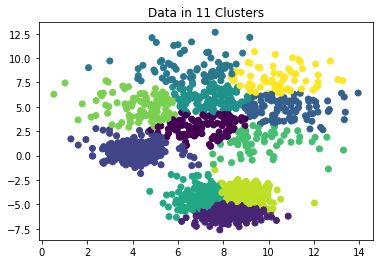

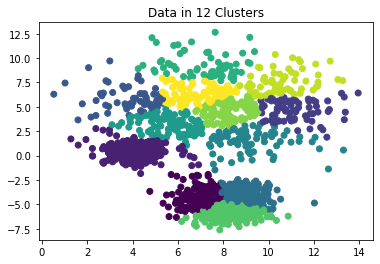

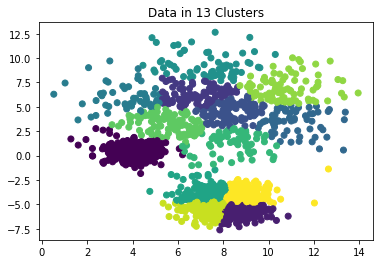

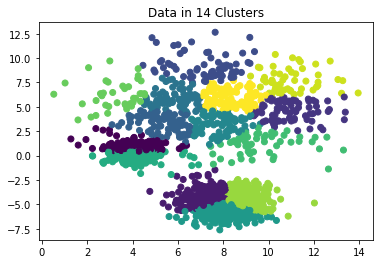

In [1]:
# Import needed libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n = 15
range_n_clusters = range(2,n)

des = []

for n_clusters in range_n_clusters:

    # Set number of samples and clusters.
    number_of_samples = 2000
    number_of_clusters = n_clusters

    # Set the random number state for cluster center initialization.
    random_state = 150

    # Set standard deviations for data points creation.
    standard_deviation = [1.0, 2.5, 0.5]

    # Create data points for clustering.
    # For details on the make_blobs function, see:
    # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
    X, y = make_blobs(n_samples=number_of_samples,
                                    cluster_std=standard_deviation,
                                    random_state=random_state)

    # Create clusters.
    # For details on the KMeans function, see:
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    #y_pred = KMeans(n_clusters=number_of_clusters,random_state=random_state)\.fit_predict(X_varied)

    km = KMeans(n_clusters=number_of_clusters,random_state=random_state)

    y_pred = km.fit_predict(X)

    # Plot the clustered data points.
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("Data in " + str(number_of_clusters) + " Clusters")

    # Display the plot.
    plt.show()
    
    k = n_clusters
    
    des.append([k,abs(km.score(X))])

des = np.array(des)

In [2]:
des

array([[2.00000000e+00, 2.13341156e+04],
       [3.00000000e+00, 8.49478983e+03],
       [4.00000000e+00, 6.19556623e+03],
       [5.00000000e+00, 4.91968063e+03],
       [6.00000000e+00, 4.16902767e+03],
       [7.00000000e+00, 3.70611916e+03],
       [8.00000000e+00, 3.29587017e+03],
       [9.00000000e+00, 2.98607858e+03],
       [1.00000000e+01, 2.69123216e+03],
       [1.10000000e+01, 2.46950865e+03],
       [1.20000000e+01, 2.31963494e+03],
       [1.30000000e+01, 2.19161301e+03],
       [1.40000000e+01, 2.06127214e+03]])

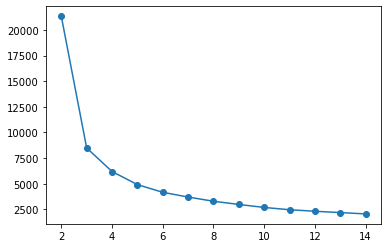

In [3]:
plt.plot(des[:, 0], des[:, 1],marker='o')
plt.show()

# Selección de K - método de la silueta

For n_clusters = 2 The average silhouette_score is : 0.5644734043898678
For n_clusters = 3 The average silhouette_score is : 0.6422331876200417
For n_clusters = 4 The average silhouette_score is : 0.6298375113267641
For n_clusters = 5 The average silhouette_score is : 0.6254437234563768
For n_clusters = 6 The average silhouette_score is : 0.6280846339156662
For n_clusters = 7 The average silhouette_score is : 0.49260962309053036
For n_clusters = 8 The average silhouette_score is : 0.49071640280367784
For n_clusters = 9 The average silhouette_score is : 0.4732450035741696
For n_clusters = 10 The average silhouette_score is : 0.48685528034754155
For n_clusters = 11 The average silhouette_score is : 0.4863695560122748
For n_clusters = 12 The average silhouette_score is : 0.4695511422611576
For n_clusters = 13 The average silhouette_score is : 0.46297565677140595
For n_clusters = 14 The average silhouette_score is : 0.3228602018323912


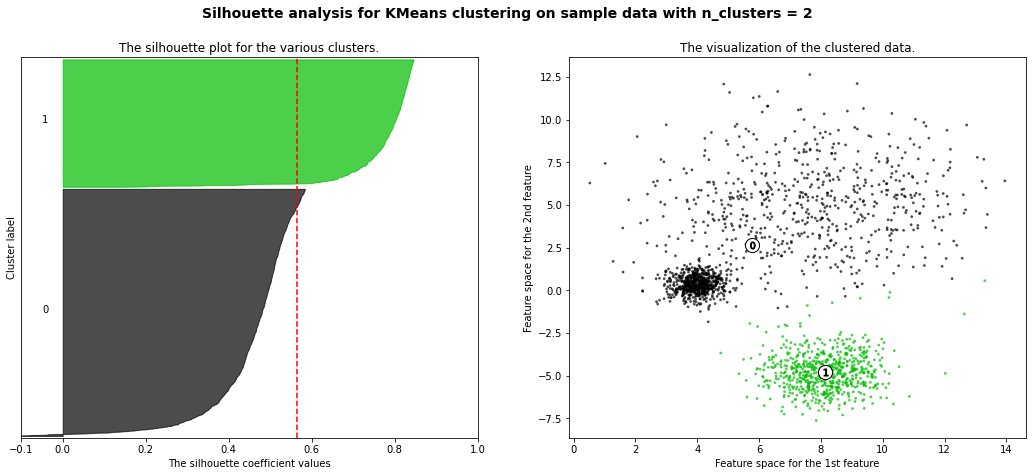

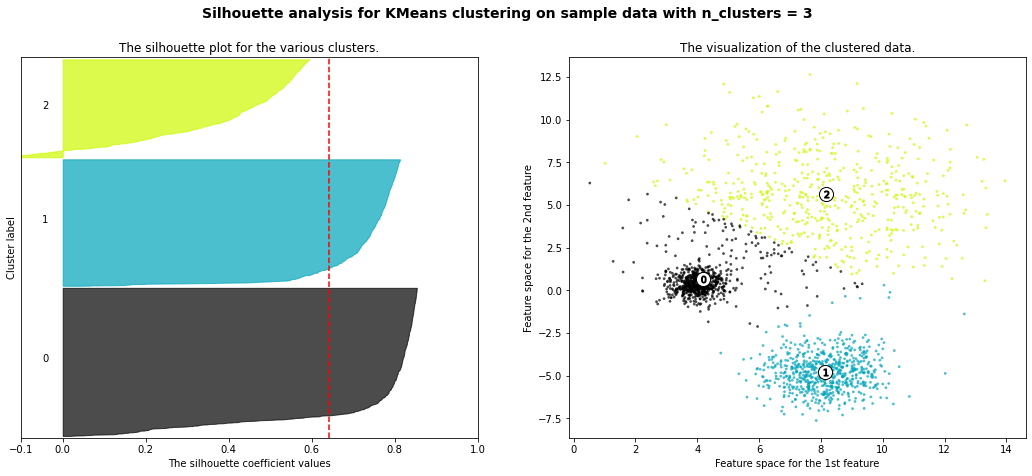

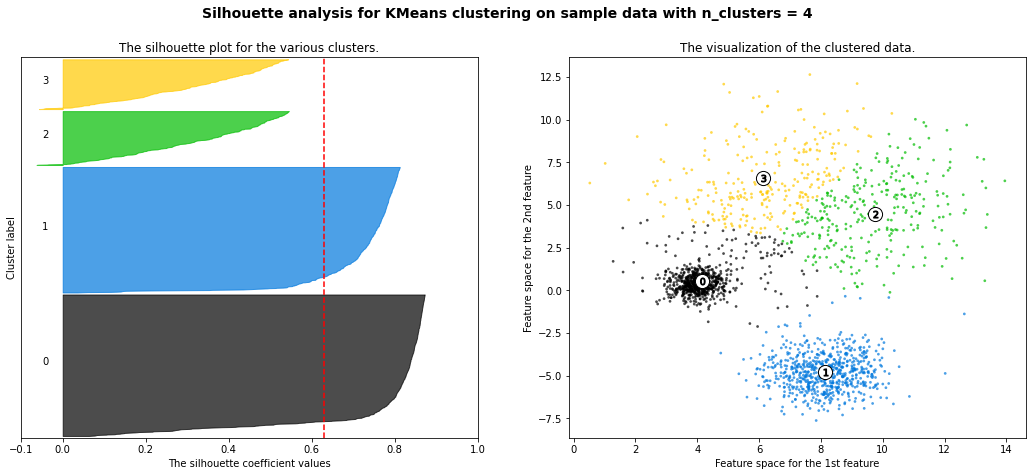

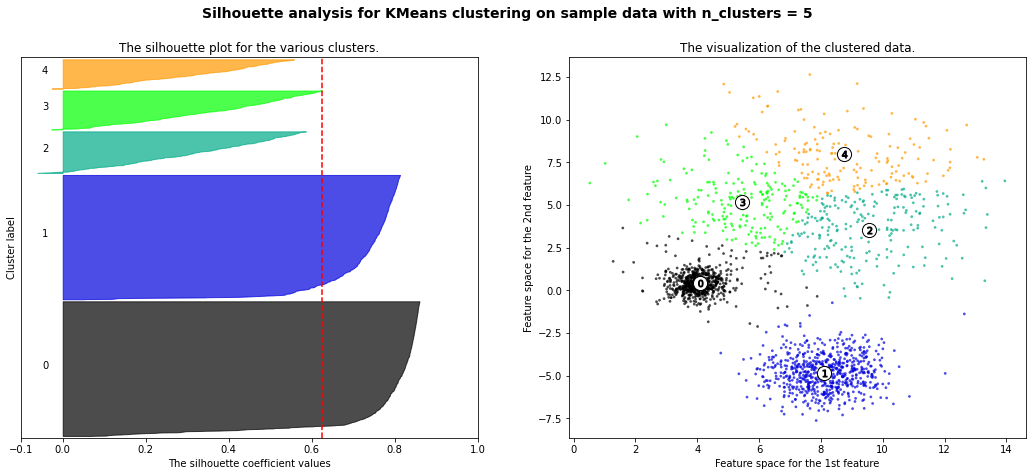

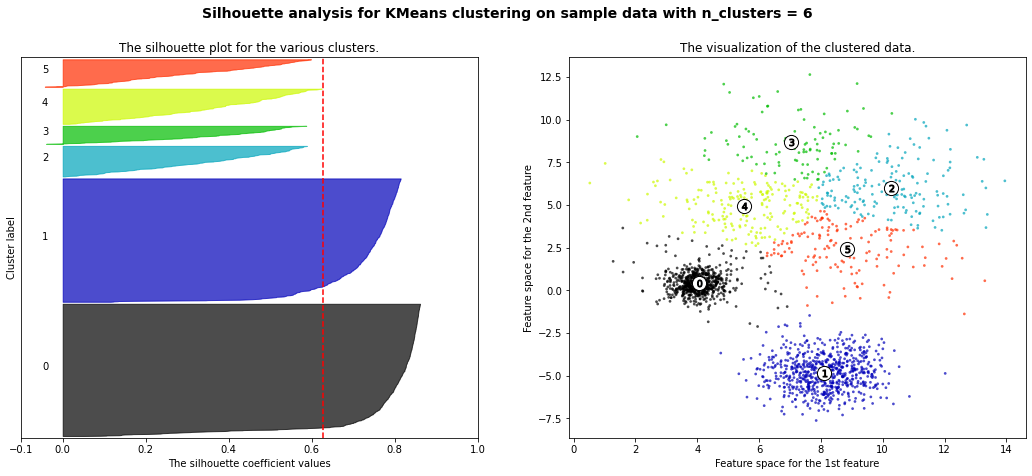

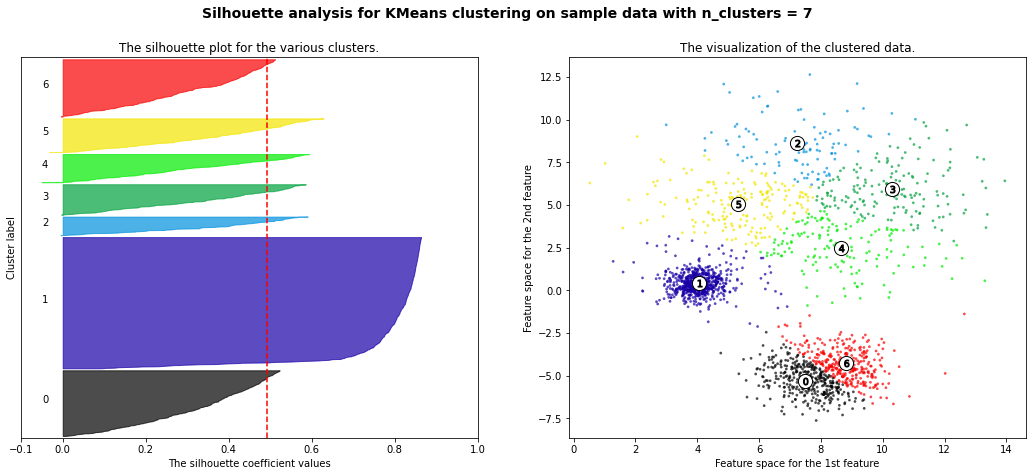

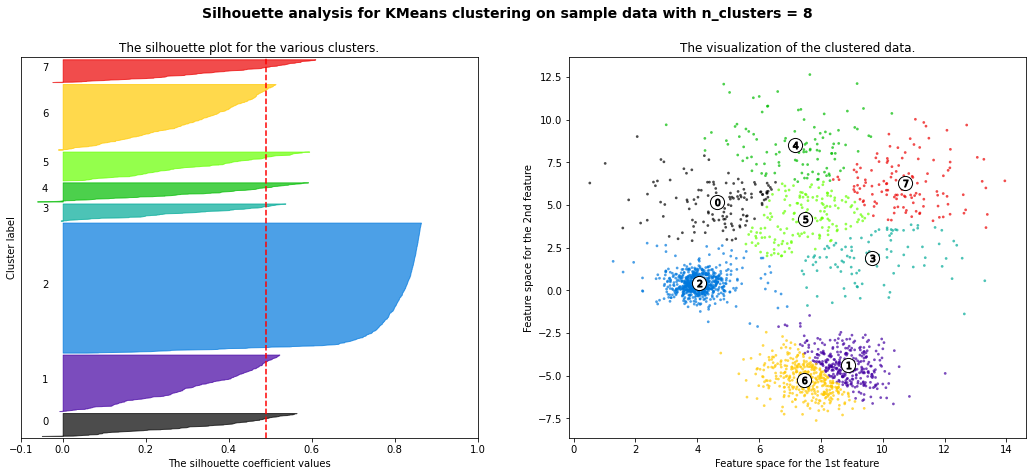

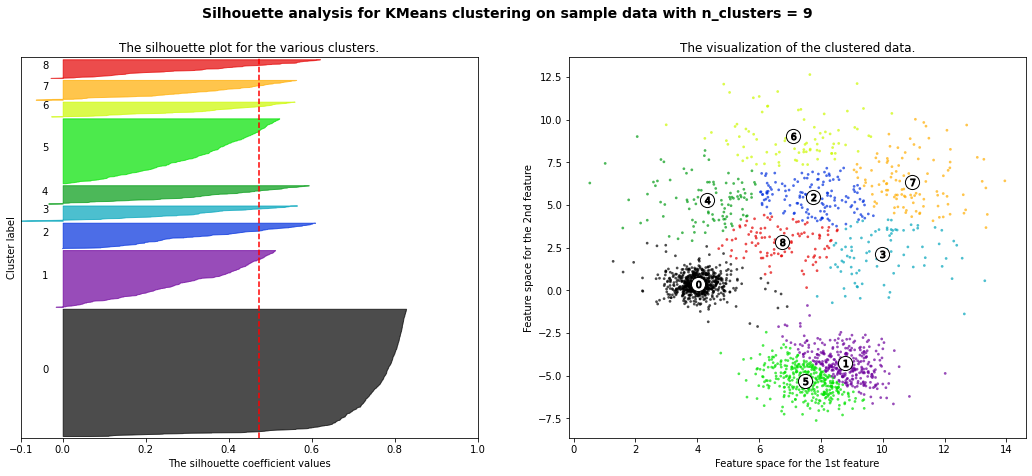

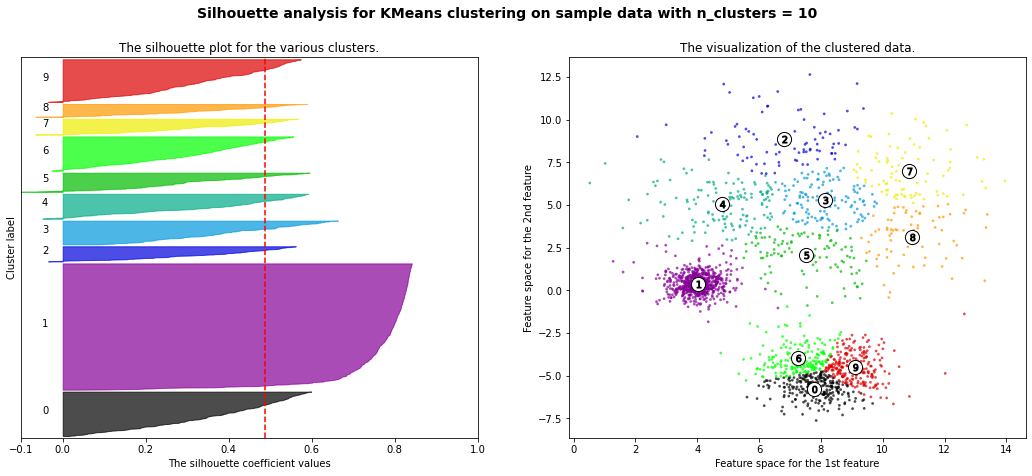

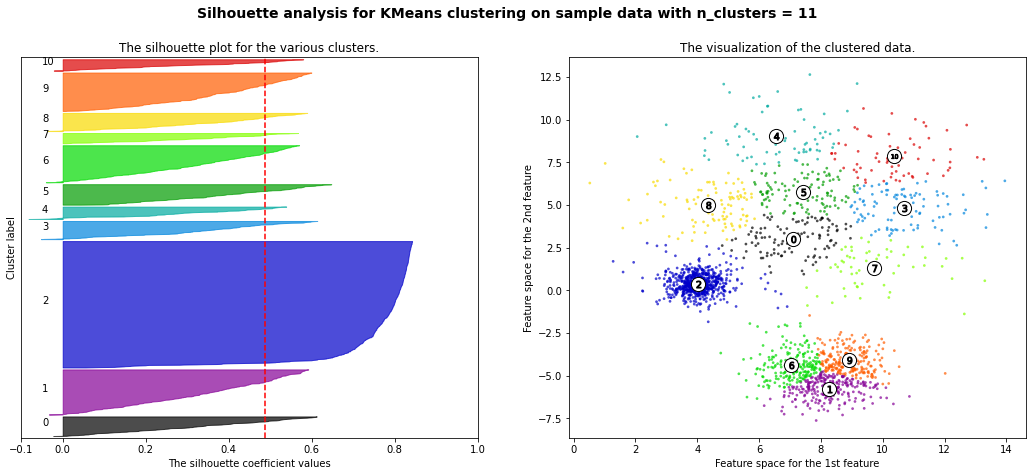

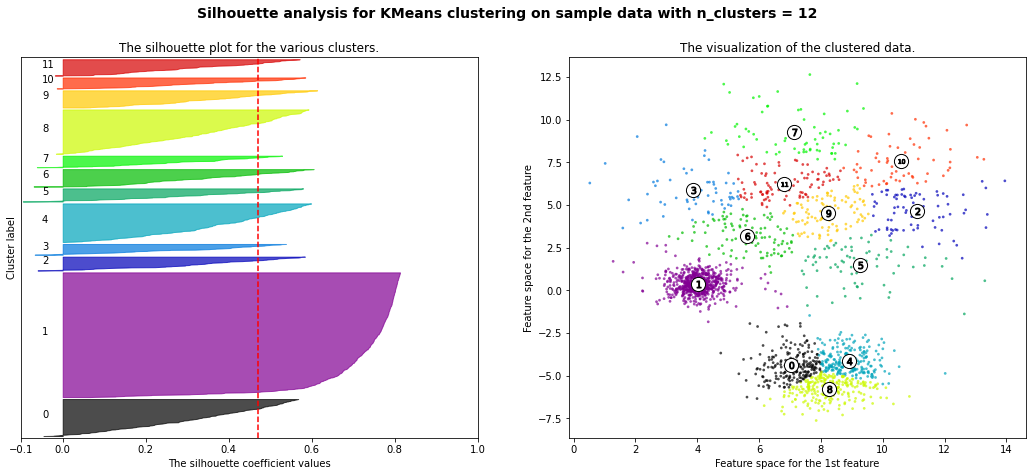

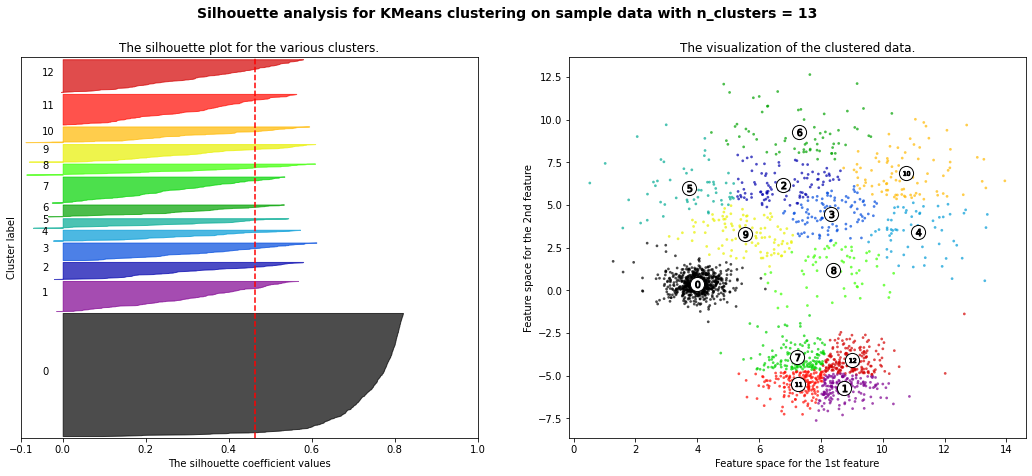

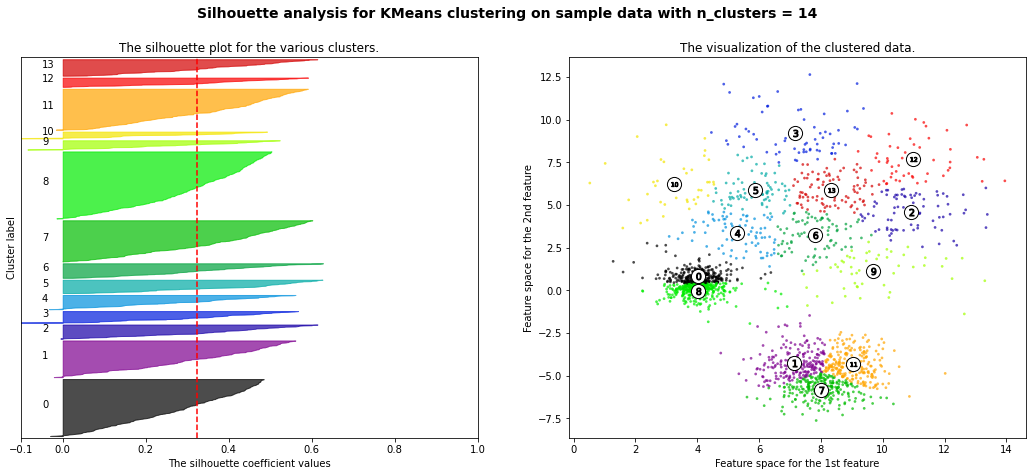

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

n = 15
range_n_clusters = range(2,n)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Selección de K - método de Calinski-Harabasz

In [5]:
# Import needed libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics

n = 15
range_n_clusters = range(2,n)

c_h_scores = []

for n_clusters in range_n_clusters:

    # Create clusters.
    # For details on the KMeans function, see:
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    #y_pred = KMeans(n_clusters=number_of_clusters,random_state=random_state)\.fit_predict(X_varied)

    number_of_clusters = n_clusters
    
    km = KMeans(n_clusters=number_of_clusters,random_state=random_state)

    y_pred = km.fit_predict(X)
    
    c_h = metrics.calinski_harabasz_score(X, y_pred)
    
    print(
        "For n_clusters =",
        n_clusters,
        "The Calinski-Harabasz score is :",
        c_h,
    )
    
    c_h_scores.append([n_clusters,c_h])

c_h_scores = np.array(c_h_scores)

For n_clusters = 2 The Calinski-Harabasz score is : 2552.0179259798147
For n_clusters = 3 The Calinski-Harabasz score is : 4712.178347480576
For n_clusters = 4 The Calinski-Harabasz score is : 4552.023578916673
For n_clusters = 5 The Calinski-Harabasz score is : 4426.659266938576
For n_clusters = 6 The Calinski-Harabasz score is : 4248.702736070032
For n_clusters = 7 The Calinski-Harabasz score is : 4022.23951810535
For n_clusters = 8 The Calinski-Harabasz score is : 3910.6660018259076
For n_clusters = 9 The Calinski-Harabasz score is : 3800.5478508845285
For n_clusters = 10 The Calinski-Harabasz score is : 3770.8466023574247
For n_clusters = 11 The Calinski-Harabasz score is : 3714.1599310258675
For n_clusters = 12 The Calinski-Harabasz score is : 3604.538019646734
For n_clusters = 13 The Calinski-Harabasz score is : 3505.268516999465
For n_clusters = 14 The Calinski-Harabasz score is : 3448.0405388929976


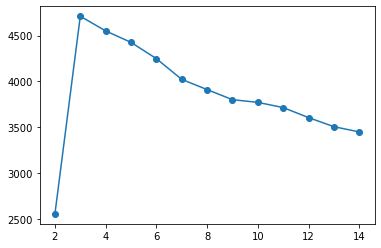

In [6]:
plt.plot(c_h_scores[:, 0], c_h_scores[:, 1],marker='o')
plt.show()